In [1]:
sns.set()
%matplotlib inline

In [2]:
# EDA 용 데어터 셋
hp_train = pd.read_csv('./train.csv')
hp_test = pd.read_csv('./test.csv')

In [3]:
# feature engineering 용 데이터 셋 
hp_train2 = pd.read_csv('./train.csv')
hp_test2 = pd.read_csv('./test.csv')

### 1) 도메인 지식 활용한 독립변수 찾기 
* 1-1) 부동산 가격에 영향을 미치는 대표적 요소 확인 [real estate](http://www.zevizoproperties.com/blog/property-selling/11-essential-factors-that-affect-property-value/)

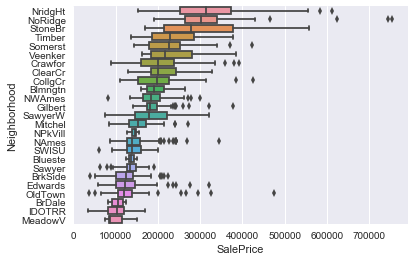

In [4]:
# 1-1-1) Neighborhood
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Location' 에 해당하는 Neighborhood 칼럼을 
# median 값 순으로 나열하여 선형성과 상관관계를 확인한다. (0.71)
order = hp_train.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False)
sns.boxplot(hp_train.SalePrice, hp_train.Neighborhood, order=order.index)

In [5]:
def order_Neighbor(x):
    '''the most high median price of Neighborhood level sets 24, the lowest 0'''
    if x == 'NridgHt':
        return 24
    elif x == 'NoRidge':
        return 23
    elif x == 'StoneBr':
        return 22
    elif x == 'Timber':
        return 21
    elif x == 'Somerst':
        return 20
    elif x == 'Veenker':
        return 19
    elif x == 'Crawfor':
        return 18
    elif x == 'ClearCr':
        return 17
    elif x == 'CollgCr':
        return 16
    elif x == 'Blmngtn':
        return 15
    elif x == 'NWAmes':
        return 14
    elif x == 'Gilbert':
        return 13
    elif x == 'SawyerW':
        return 12
    elif x == 'Mitchel':
        return 11
    elif x == 'NPkVill':
        return 10
    elif x == 'NAmes':
        return 9
    elif x == 'SWISU':
        return 8
    elif x == 'Blueste':
        return 7
    elif x == 'Sawyer':
        return 6
    elif x == 'BrkSide':
        return 5
    elif x == 'Edwards':
        return 4
    elif x == 'OldTown':
        return 3
    elif x == 'BrDale':
        return 2
    elif x == 'IDOTRR':
        return 1
    elif x == 'MeadowV':
        return 0
    
    
hp_train['Ordered_Num_Neighborhood'] = hp_train['Neighborhood'].apply(order_Neighbor)

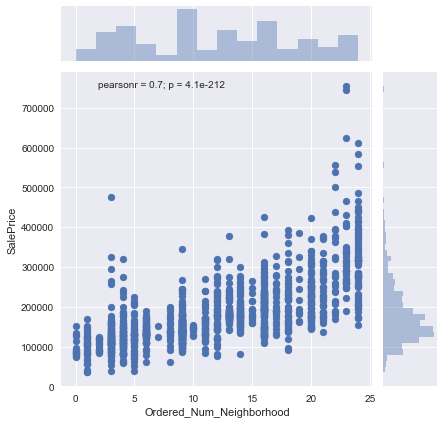

In [6]:
sns.jointplot(x='Ordered_Num_Neighborhood', y='SalePrice', data=hp_train)

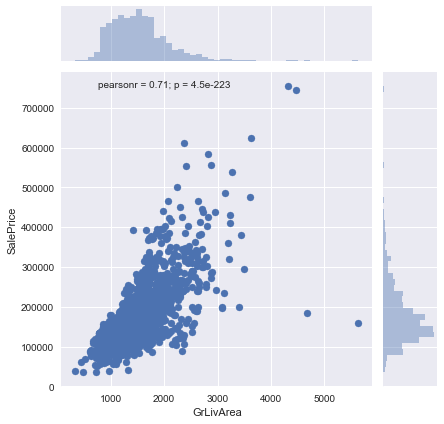

In [7]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=hp_train)

In [8]:
# 1-1-2) TotalFlrSF
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Size' 를 확인하기 위해  
# 1stFlrSF 와 2ndFlrSF 를 결합한 TotalFlrSF 칼럼을 새로 만든후 선형성과 상관관계를 확인한다. (0.72)
hp_train['TotalFlrSF'] = hp_train['1stFlrSF'] + hp_train['2ndFlrSF']

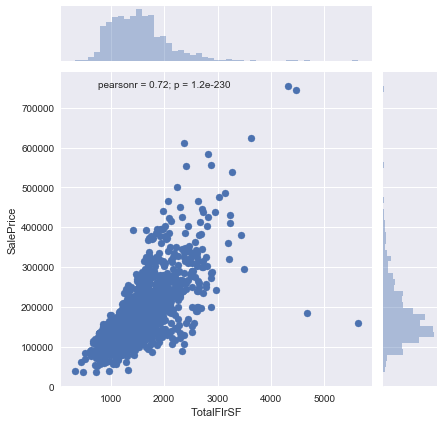

In [9]:
sns.jointplot(x='TotalFlrSF', y='SalePrice', data=hp_train)

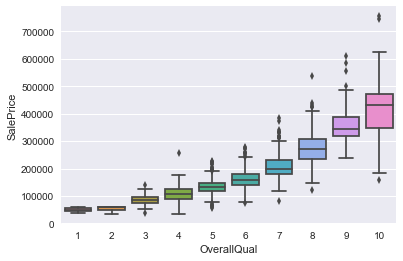

In [10]:
# 1-1-3) Condition 
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Condition' 을 확인하기 위해  
# OveralQual의 선형성과 상관관계를 확인한다. (0.79)
sns.boxplot(x='OverallQual', y='SalePrice',data=hp_train)

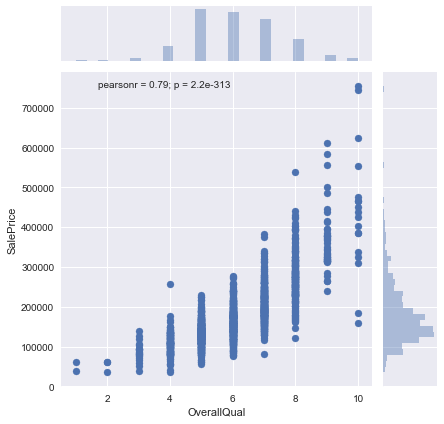

In [11]:
sns.jointplot(x='OverallQual', y='SalePrice', data=hp_train)

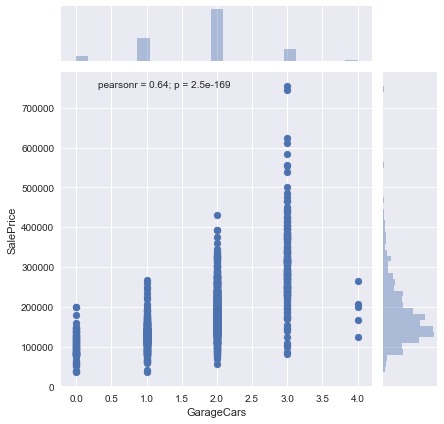

In [12]:
#1-1-4) 'GarageCars'
# GarageCars의 선형성과 상관관계를 확인한다. (0.64)
sns.jointplot(x='GarageCars', y='SalePrice', data=hp_train)

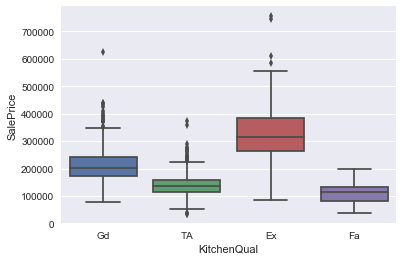

In [13]:
#1-1-5) 'KitchenQual'
# KitchenQual 선형성과 상관관계를 확인한다. (0.66)
sns.boxplot(x='KitchenQual', y='SalePrice', data=hp_train)

In [14]:
def fkq(col):
    if col == 'Ex':
        return 4
    elif col == 'Gd':
        return 3
    elif col == 'TA':
        return 2
    elif col == 'Fa':
        return 1
    elif col == 'Po':
        return 0

hp_train['Num_KitchenQual'] = hp_train['KitchenQual'].apply(fkq)

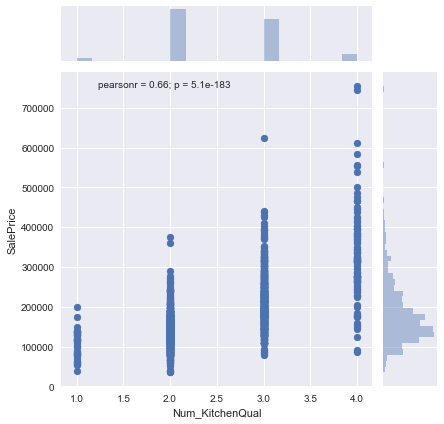

In [15]:
sns.jointplot(x='Num_KitchenQual', y='SalePrice', data=hp_train)

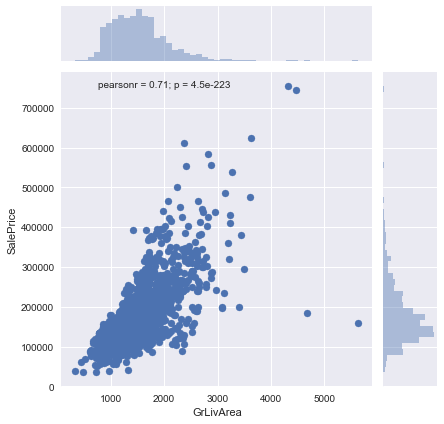

In [16]:
#1-1-6) 'GrLivArea'
# Random Forest 결과로 중요 feature 상위에 랭크된 GrLivArea 선형성과 상관관계를 확인한다. (0.71)
sns.jointplot(x='GrLivArea', y='SalePrice', data=hp_train)

### 2) Feature Engineering
* NaN 값은 mode 또는 median 으로 대체해준다. 
* outlier 가 속한 row는 삭제해준다 (to do)

#### * train 과  test 를 일시적으로 합쳐, 동일하게 engineering 작업을 해준다 

In [ ]:
# NaN 값 처리 

In [18]:
# SalePrice 칼럼을 따로 저장한 후 train 에서 삭제한다. 
data = hp_train2['SalePrice']
hp_train2.drop('SalePrice', axis=1, inplace=True);

In [19]:
# train 과 test 를 합친 후, 동일하게 feature engineering 을 해준다. 
hp_all = pd.concat([hp_train2, hp_test2], axis=0)
hp_all.shape

(2919, 80)

In [20]:
# TotalFlrSF 칼럼을 새로 만들어준후, 
# 이를 포함한 총 6개의 칼럼을 최종 feature로 선택한다. + 1(ExterQual)
hp_all['TotalFlrSF'] = hp_all['1stFlrSF'] + hp_all['2ndFlrSF']
fs_hp = hp_all[['OverallQual', 'TotalFlrSF', 'GrLivArea', 'Neighborhood', 'KitchenQual', 'GarageCars', 'ExterQual']]

In [21]:
# Missing value 의 존재를 확인한다. 
fs_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
OverallQual     2919 non-null int64
TotalFlrSF      2919 non-null int64
GrLivArea       2919 non-null int64
Neighborhood    2919 non-null object
KitchenQual     2918 non-null object
GarageCars      2918 non-null float64
ExterQual       2919 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 182.4+ KB


In [22]:
fs_hp[fs_hp.isnull().any(axis=1)]

,OverallQual,TotalFlrSF,GrLivArea,Neighborhood,KitchenQual,GarageCars,ExterQual
95,5,1224,1224,ClearCr,NaN,1.0,TA
1116,5,1828,1828,IDOTRR,Gd,NaN,TA


In [23]:
# KitchenQual 칼럼의 최빈값을 확인한 후, NaN 대신에 넣어준다. 
fs_hp['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [24]:
fs_hp['KitchenQual'].fillna('TA', inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
# GarageCars 의 NaN 값에는 최빈값을 대신 넣어준다. 
fs_hp['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [26]:
fs_hp['GarageCars'].fillna(2.0, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
# Missing values 가 잘 처리 되었음을 확인한다. 
fs_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
OverallQual     2919 non-null int64
TotalFlrSF      2919 non-null int64
GrLivArea       2919 non-null int64
Neighborhood    2919 non-null object
KitchenQual     2919 non-null object
GarageCars      2919 non-null float64
ExterQual       2919 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 182.4+ KB


In [ ]:
# outlier 처리 

In [28]:
import statsmodels.api as sm 

In [29]:
# df_train, y, df_test 준비 
df_train = fs_hp.iloc[:1460, :]
df_test = fs_hp.iloc[1460:, :]

In [30]:
df_train.loc[:,('SalePrice')] = data

C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
df_train.columns

Index(['OverallQual', 'TotalFlrSF', 'GrLivArea', 'Neighborhood', 'KitchenQual',
       'GarageCars', 'ExterQual', 'SalePrice'],
      dtype='object')

In [32]:
model = sm.OLS.from_formula('SalePrice ~ OverallQual + TotalFlrSF + GrLivArea + Neighborhood + KitchenQual + GarageCars + ExterQual', data=df_train)

In [33]:
res = model.fit()

In [47]:
#TotalFlrSF 와 GrLivArea 의 상관계수가 높음을 발견
# SalePrice 와의 상관계수가 높은 TotalFlrSF 를 남기고 GrLivAre 삭제 
df_train.corr()

,OverallQual,TotalFlrSF,GrLivArea,GarageCars,SalePrice
OverallQual,1.000000,0.600758,0.593007,0.600671,0.790982
TotalFlrSF,0.600758,1.000000,0.995718,0.479932,0.716883
GrLivArea,0.593007,0.995718,1.000000,0.467247,0.708624
GarageCars,0.600671,0.479932,0.467247,1.000000,0.640409
SalePrice,0.790982,0.716883,0.708624,0.640409,1.000000


In [48]:
df_train.drop('GrLivArea', axis=1, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
from statsmodels.graphics import utils

In [34]:
influence = res.get_influence()

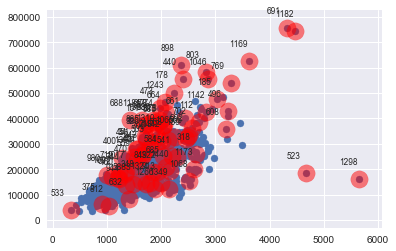

82


In [51]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df_train.SalePrice.values) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(df_train.TotalFlrSF.values, df_train.SalePrice.values)
plt.scatter(df_train.TotalFlrSF.values[idx], df_train.SalePrice.values[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(df_train.TotalFlrSF.values[idx], df_train.SalePrice.values[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()
print(len(df_train.TotalFlrSF.values[idx]))

In [58]:
df_train.TotalFlrSF.values.max()

5642

In [59]:
outlier_list_TotalFlrSF = df_train.TotalFlrSF.values[idx]

In [66]:
drop_index = df_train[df_train['TotalFlrSF'].isin(outlier_list_TotalFlrSF)].index

In [68]:
df_train.drop(drop_index, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
model2 = sm.OLS.from_formula('SalePrice ~ OverallQual + TotalFlrSF + Neighborhood + KitchenQual + GarageCars + ExterQual', data=df_train)
res2 = model2.fit()
sol2 = res2.predict(df_test)

In [73]:
fsol2 = pd.DataFrame({'Id':hp_test.Id.values, 'SalePrice':sol2})

In [74]:
fsol2[['Id', 'SalePrice']].to_csv('./fsol2.csv', index=False)

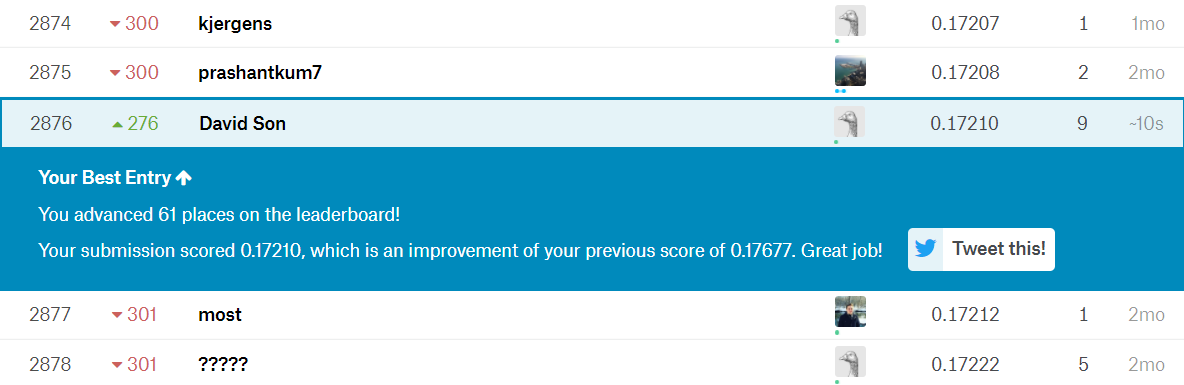

In [75]:
# 결과1) : 인위적 카테고리값 전처리(median값에 의한 정렬) 보다, 
#          dummy 변수에 의한 모형이 좀 더 나은 결과 보임
# 결과2) : 결과1의 모델에, 아웃라이어제거(수치형자료 'TotalFlrSF) 및 
#          변수간상관관계제거(TotalFlrSF & GrLivArea) 를 통해 보다 좋은 결과 보임      
# 남은 과제) : 범주형자료에 대한 아웃라이어 제거 
#              변수변환 여부 고려 
#              교차검증에 의한 최선의 모델 선정
#
from IPython.display import Image
Image('./fsol2ranking.png')